# DEEP LEARNING

## Objetivo:

Aplique los temas vistos en los seminarios de Deep Learning en sus proyectos de investigación y familiarícese con librerías como word2vec y keras.

## Trabajo Grupal
### Integrantes
* Carlos Alfredo Silva Villafuerte

Resumen de los datos usados:
5917 publicaciones 

pip install Cython
pip install word2vec unidecode nltk	stop_words sklearn scipy matplotlib	




# Training the word embeddings model, word2vec

In [1]:
## use of some steps like tokenize, conversion of characters to lower-case, conversion of special characters á -> a, ñ->n
## removal of punctuation and removal of stopwords (the, to, an, and, a, this)

import numpy as np
import pandas as pd



[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

In [ ]:
import word2vec
from unidecode import unidecode

In [ ]:
file_datapath = "Publicaciones.csv"
file_datapathTxt = "Publicaciones.txt"
file_datapathTxtWithoutNoise = "Publicaciones_without_Noise.txt"
df = pd.read_csv(file_datapath, sep=',', comment='#' , error_bad_lines=True )

In [2]:
tknzr = TweetTokenizer()
stop_words = [unidecode(stopW) for stopW in stopwords.words('english')]

#Want to preprocess Spanish text? Remove next comment:
#stop_words = [unidecode(stopW) for stopW in stopwords.words('spanish')]

non_words = list(punctuation)
non_words.extend(['¿', '¡', 'q', 'd', 'x', 'xq', '...', '..']) #stopwords that are not present in the official punctuation/stopwords lists, then we added them 
stop_words = stop_words + non_words

In [4]:
# For you to try. Make a list of sentences that would need to be preprocessed
dirty_sentences = np.array(df['publicacion'])
#Clean yor sentences and save them in another list
clean_sentences=[] #list to put previous sentences once they are preprocessed
for dirty_sent in dirty_sentences:
    #dirty_sent = str(dirty_sent).encode('utf-8')
    #print(dirty_sent)
    tokens=[token.lower() for token in tknzr.tokenize(unidecode(dirty_sent)) 
                          if token.lower() not in stop_words]
    processed_sentence = ' '.join(tokens) 
    clean_sentences.append(processed_sentence)


['wrong sentence 1 need clean', 'hashtags #nice #cool #bad #verybad mentions @my_account @another_account', 'full stopwords like avoid']


## 1) Create a file only with the publications titles

In [ ]:
np.savetxt(file_datapathTxtWithoutNoise, clean_sentences, delimiter=",")
df['publicacion'].to_csv(file_datapathTxt, header=True, index=False, sep='\t', mode='a')

## 2) Create a model

In [9]:
#train the model giving as input the training dataset (preprocesssed tweets in txt file) and the name of the file where we are going to save the model
#in the parameters we have assigned values for size that represents the number of dimensions for the result vectors and window to consider in which 'context' the evaluated word is going to be (words before and after target)
word2vec.word2vec(file_datapathTxt, 'Publicaciones_model.bin', size=300, window= 5, verbose=True)

b'Starting training using file tweetsNOStemmed_corpusReady_word2vec.txt\n'b'100K\r200K\r300K\r400K\r500K\r600K\r700K\r800K\r900K\r1000K\r1100K\r1200K\r1300K\r1400K\r1500K\r1600K\r1700K\r1800K\r1900K\r2000K\r2100K\r2200K\r2300K\r2400K\r2500K\r2600K\r2700K\r2800K\rVocab size: 39216\n'b'Words in train file: 2425851\n'b'\rAlpha: 0.025000  Progress: 0.08%  Words/thread/sec: 13.88k  \rAlpha: 0.024979  Progress: 0.16%  Words/thread/sec: 26.66k  \rAlpha: 0.024959  Progress: 0.25%  Words/thread/sec: 37.46k  \rAlpha: 0.024938  Progress: 0.33%  Words/thread/sec: 46.61k  \rAlpha: 0.024918  Progress: 0.41%  Words/thread/sec: 57.32k  \rAlpha: 0.024897  Progress: 0.49%  Words/thread/sec: 67.61k  \rAlpha: 0.024876  Progress: 0.58%  Words/thread/sec: 76.04k  \rAlpha: 0.024856  Progress: 0.66%  Words/thread/sec: 86.53k  \rAlpha: 0.024835  Progress: 0.74%  Words/thread/sec: 96.01k  \rAlpha: 0.024814  Progress: 0.82%  Words/thread/sec: 103.63k  \rAlpha: 0.024794  Progress: 0.91%  Words/thread/sec: 110.71k

In [10]:
model = word2vec.load('Publicaciones_model.bin') #load the trained model

## Exploring the work of word embeddings

In [11]:
print(model.vectors.shape)   #verify the size of the vocabulary (number of words from which we extracted the vectors) and the dimensions of vector representation

(39216, 300)


In [12]:
indexes, metrics = model.similar('UNIVERSIDAD',10)  #target word and the number of desired results (similar words)
model.generate_response(indexes, metrics).tolist() #sentence to print results: word, measure_of_similarity (being 1 the most similar)

[('maduro', 0.8548300269656469),
 ('mashi', 0.8405646080858858),
 ('oposicion', 0.8391034127144901),
 ('lasso', 0.8356407433075596),
 ('corrupto', 0.8337594350651147),
 ('glas', 0.8290965386550337),
 ('fiscal', 0.8282787139071974),
 ('renuncia', 0.8207608532314713),
 ('corrupcion', 0.8204581842927039),
 ('ap', 0.8200846134035649)]

In [16]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [17]:
model.vocab[10:20]  #model.vocab contains the list of words in the vocabulary model

array(['emitiendo', 'asi', 'vida', 'solo', 'mp3', 'mejor', 'siempre',
       'pais', '3', 'anos'], dtype='<U78')

In [28]:
model['</s>']   #if we call the model specifying a given word, it is going to present the 300dim vector that belongs to that word

array([ 0.08015626,  0.08850129, -0.07670335, -0.0656449 ,  0.02736655,
        0.06049915,  0.01884124,  0.0042321 , -0.07216264,  0.04442634,
       -0.0872393 ,  0.02502286, -0.0150461 , -0.0191682 , -0.06639965,
       -0.03769165,  0.051653  ,  0.06058471,  0.05945717,  0.03198978,
        0.03093557, -0.07615028, -0.08202022,  0.09952002,  0.07612278,
        0.06188031, -0.01209433,  0.08041599, -0.00991258,  0.01471304,
       -0.00298844, -0.05974134,  0.02627874, -0.02678292, -0.07660557,
        0.09520542,  0.08769764, -0.02193052, -0.0045285 ,  0.01019676,
       -0.07284711, -0.08024487,  0.09121166,  0.00126199, -0.05171411,
       -0.06092083, -0.06160836,  0.03398207,  0.00403348,  0.02665458,
       -0.08437919, -0.07625417, -0.00260343,  0.02290222,  0.0510602 ,
       -0.06348148,  0.08169632,  0.01856318,  0.02242248, -0.01218294,
        0.05980551, -0.04581362, -0.0420032 ,  0.04322241, -0.01508277,
        0.02064103,  0.03613632, -0.0818766 , -0.03971145,  0.05

In [29]:
model.vectors[0] #this is another way to get the vector of a word if we know in which position in model.vocab the word is

array([ 0.08015626,  0.08850129, -0.07670335, -0.0656449 ,  0.02736655,
        0.06049915,  0.01884124,  0.0042321 , -0.07216264,  0.04442634,
       -0.0872393 ,  0.02502286, -0.0150461 , -0.0191682 , -0.06639965,
       -0.03769165,  0.051653  ,  0.06058471,  0.05945717,  0.03198978,
        0.03093557, -0.07615028, -0.08202022,  0.09952002,  0.07612278,
        0.06188031, -0.01209433,  0.08041599, -0.00991258,  0.01471304,
       -0.00298844, -0.05974134,  0.02627874, -0.02678292, -0.07660557,
        0.09520542,  0.08769764, -0.02193052, -0.0045285 ,  0.01019676,
       -0.07284711, -0.08024487,  0.09121166,  0.00126199, -0.05171411,
       -0.06092083, -0.06160836,  0.03398207,  0.00403348,  0.02665458,
       -0.08437919, -0.07625417, -0.00260343,  0.02290222,  0.0510602 ,
       -0.06348148,  0.08169632,  0.01856318,  0.02242248, -0.01218294,
        0.05980551, -0.04581362, -0.0420032 ,  0.04322241, -0.01508277,
        0.02064103,  0.03613632, -0.0818766 , -0.03971145,  0.05

In [18]:
## Next you have some necessary steps part of the transformation of 300dim to 2D in order to plot
pca = PCA(n_components=2)

In [19]:
# you can think of a group of words that make sense to be together/far away
toplot_words=['UNIVERSIDAD','FINCAS', 'ESCUELAS', 
            'HARINA','VACTERIA',
            'SISTEMA','EFICIENCIA','ESTABILIDAD','EVALUACIÓN' 
           ]

toplot_vecs=[model[w] for w in toplot_words] #getting the vectors for the specific words in toplot_words
result = pca.fit_transform(toplot_vecs) #call to pca for transformation

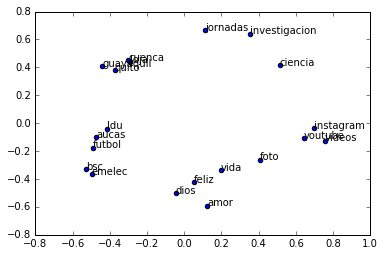

In [20]:
# finally plotting...
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(toplot_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()